In [2]:
#import necessary packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import re
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import necessary packages for further word processing
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2020)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /global/homes/d/dsmorrow/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
#function to perform lemmatize and stem preprocessing steps on the data set.
def lemmatize_stemming(text):
    stemmer = PorterStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
            result.append(lemmatize_stemming(token))
    return result

In [5]:
dateparse = lambda dates: [pd.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in dates]
diagnosis_icd9 = pd.read_csv("/project/projectdirs/m1532/Projects_MVP/_datasets/mimiciii/DIAGNOSES_ICD.csv", usecols= ["SUBJECT_ID", "ICD9_CODE"])
patients = pd.read_csv("/project/projectdirs/m1532/Projects_MVP/_datasets/mimiciii/PATIENTS.csv", parse_dates= ["DOB"], date_parser=dateparse, usecols=["SUBJECT_ID", "DOB", "GENDER"])
admissions = pd.read_csv("/project/projectdirs/m1532/Projects_MVP/_datasets/mimiciii/ADMISSIONS.csv", parse_dates= ["ADMITTIME"], date_parser=dateparse, usecols=["SUBJECT_ID", "ADMITTIME", "ETHNICITY"])
notes = pd.read_csv("/project/projectdirs/m1532/Projects_MVP/_datasets/mimiciii/NOTEEVENTS.csv", usecols = ['SUBJECT_ID','CATEGORY', 'TEXT'])

In [5]:
#filter for only diabetes ICD9 codes
diag_db_DF = diagnosis_icd9[diagnosis_icd9["ICD9_CODE"].str.startswith(('250', '249', '648'), na = False)]
diag_db_DF.head()

,SUBJECT_ID,ICD9_CODE
71,117,25000
91,117,25000
113,123,25000
206,130,25000
214,130,25060


In [6]:
#merge diabetes dataframe with notes
icd9_db = pd.merge(diag_db_DF, patients, on ='SUBJECT_ID')
icd9_db

,SUBJECT_ID,ICD9_CODE,GENDER,DOB
0,117,25000,F,2083-12-28
1,117,25000,F,2083-12-28
2,123,25000,M,2105-08-31
3,130,25000,M,2058-06-03
4,130,25060,M,2058-06-03
...,...,...,...,...
16776,96908,25040,M,2110-08-15
16777,96908,25060,M,2110-08-15
16778,97144,25000,F,2099-12-22
16779,97488,25062,M,2061-07-01


In [7]:
#merge diabetes dataframe with notes
icd9_db2 = pd.merge(icd9_db, admissions, on ='SUBJECT_ID')
icd9_db2

,SUBJECT_ID,ICD9_CODE,GENDER,DOB,ADMITTIME,ETHNICITY
0,117,25000,F,2083-12-28,2133-04-07 16:29:00,WHITE
1,117,25000,F,2083-12-28,2133-11-13 21:34:00,WHITE
2,117,25000,F,2083-12-28,2133-04-07 16:29:00,WHITE
3,117,25000,F,2083-12-28,2133-11-13 21:34:00,WHITE
4,123,25000,M,2105-08-31,2161-10-29 02:27:00,HISPANIC OR LATINO
...,...,...,...,...,...,...
48483,97144,25000,F,2099-12-22,2187-02-07 14:00:00,WHITE
48484,97488,25062,M,2061-07-01,2128-04-08 20:58:00,WHITE
48485,97488,25062,M,2061-07-01,2128-08-27 15:01:00,WHITE
48486,97488,25000,M,2061-07-01,2128-04-08 20:58:00,WHITE


In [8]:
icd9_db_female = icd9_db2[icd9_db2['GENDER']=='F']
icd9_db_female 

,SUBJECT_ID,ICD9_CODE,GENDER,DOB,ADMITTIME,ETHNICITY
0,117,25000,F,2083-12-28,2133-04-07 16:29:00,WHITE
1,117,25000,F,2083-12-28,2133-11-13 21:34:00,WHITE
2,117,25000,F,2083-12-28,2133-04-07 16:29:00,WHITE
3,117,25000,F,2083-12-28,2133-11-13 21:34:00,WHITE
12,75,25000,F,2070-06-27,2147-04-05 08:00:00,WHITE
...,...,...,...,...,...,...
48467,95798,25002,F,2057-09-17,2125-11-17 23:04:00,BLACK/AFRICAN AMERICAN
48468,95806,25000,F,2117-08-11,2176-02-23 00:00:00,WHITE
48469,95810,25000,F,2070-01-12,2128-09-09 14:00:00,WHITE
48470,96008,25000,F,2099-12-16,2177-08-06 08:52:00,WHITE


In [9]:
icd9_db_male = icd9_db2[icd9_db2['GENDER']=='M']
icd9_db_male 

,SUBJECT_ID,ICD9_CODE,GENDER,DOB,ADMITTIME,ETHNICITY
4,123,25000,M,2105-08-31,2161-10-29 02:27:00,HISPANIC OR LATINO
5,130,25000,M,2058-06-03,2119-10-29 14:49:00,WHITE
6,130,25000,M,2058-06-03,2119-11-14 12:00:00,WHITE
7,130,25060,M,2058-06-03,2119-10-29 14:49:00,WHITE
8,130,25060,M,2058-06-03,2119-11-14 12:00:00,WHITE
...,...,...,...,...,...,...
48482,96908,25060,M,2110-08-15,2145-09-04 11:10:00,HISPANIC OR LATINO
48484,97488,25062,M,2061-07-01,2128-04-08 20:58:00,WHITE
48485,97488,25062,M,2061-07-01,2128-08-27 15:01:00,WHITE
48486,97488,25000,M,2061-07-01,2128-04-08 20:58:00,WHITE


In [10]:
icd9_db2.ETHNICITY.unique()

array(['WHITE', 'HISPANIC OR LATINO', 'UNKNOWN/NOT SPECIFIED', 'ASIAN',
       'ASIAN - CHINESE', 'OTHER', 'BLACK/AFRICAN AMERICAN',
       'PATIENT DECLINED TO ANSWER', 'AMERICAN INDIAN/ALASKA NATIVE',
       'WHITE - RUSSIAN', 'BLACK/AFRICAN', 'HISPANIC/LATINO - SALVADORAN',
       'HISPANIC/LATINO - PUERTO RICAN', 'ASIAN - ASIAN INDIAN',
       'BLACK/CAPE VERDEAN', 'HISPANIC/LATINO - GUATEMALAN',
       'CARIBBEAN ISLAND', 'UNABLE TO OBTAIN', 'WHITE - EASTERN EUROPEAN',
       'MULTI RACE ETHNICITY', 'WHITE - BRAZILIAN',
       'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)', 'ASIAN - THAI',
       'PORTUGUESE', 'HISPANIC/LATINO - DOMINICAN', 'BLACK/HAITIAN',
       'HISPANIC/LATINO - CUBAN', 'ASIAN - VIETNAMESE',
       'HISPANIC/LATINO - HONDURAN',
       'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER',
       'WHITE - OTHER EUROPEAN', 'ASIAN - OTHER',
       'HISPANIC/LATINO - MEXICAN', 'ASIAN - FILIPINO', 'SOUTH AMERICAN',
       'ASIAN - CAMBODIAN', 'MIDDLE EASTERN', 'ASIAN - JAPANES

In [11]:
#select for hispanic females
icd9_db_fhispanic  = icd9_db_female [icd9_db_female ["ETHNICITY"].str.startswith(('HISPANIC'), na = False)]
icd9_db_fhispanic = icd9_db_fhispanic.drop_duplicates()
icd9_db_fhispanic.head()

,SUBJECT_ID,ICD9_CODE,GENDER,DOB,ADMITTIME,ETHNICITY
133,450,25000,F,2074-11-09,2155-05-10 18:12:00,HISPANIC OR LATINO
134,450,25000,F,2074-11-09,2155-07-24 13:28:00,HISPANIC OR LATINO
144,345,25002,F,1869-05-21,2169-05-21 22:03:00,HISPANIC OR LATINO
271,655,64864,F,2098-05-17,2133-05-02 08:37:00,HISPANIC OR LATINO
660,1184,25000,F,2040-04-27,2113-10-29 22:42:00,HISPANIC OR LATINO


In [12]:
#merge dataframe with notes
icd9_fhispanic = pd.merge(icd9_db_fhispanic, notes, on ='SUBJECT_ID')
icd9_fhispanic.head()

,SUBJECT_ID,ICD9_CODE,GENDER,DOB,ADMITTIME,ETHNICITY,CATEGORY,TEXT
0,450,25000,F,2074-11-09,2155-05-10 18:12:00,HISPANIC OR LATINO,Discharge summary,Admission Date: [**2155-5-10**] ...
1,450,25000,F,2074-11-09,2155-05-10 18:12:00,HISPANIC OR LATINO,Discharge summary,Admission Date: [**2155-7-24**] ...
2,450,25000,F,2074-11-09,2155-05-10 18:12:00,HISPANIC OR LATINO,Echo,PATIENT/TEST INFORMATION:\nIndication: Endocar...
3,450,25000,F,2074-11-09,2155-05-10 18:12:00,HISPANIC OR LATINO,ECG,Multifocal atrial tachycardia\nPrior inferior ...
4,450,25000,F,2074-11-09,2155-05-10 18:12:00,HISPANIC OR LATINO,ECG,Probable sinus tachycardia\nLeft axis deviatio...


In [13]:
#pre-preprocess these notes
# Remove punctuation and anything that isnt a character or number 
icd9_fhispanic['text_processed'] = icd9_fhispanic['TEXT'].map(lambda x: re.sub('[_\\W]+', ' ', x))
# Convert to lowercase
icd9_fhispanic['text_processed'] = icd9_fhispanic['text_processed'].map(lambda x: x.lower())

In [14]:
#select for black female
icd9_db_fblack  = icd9_db_female [icd9_db_female ["ETHNICITY"].str.startswith(('BLACK'), na = False)]
icd9_db_fblack = icd9_db_fblack.drop_duplicates()
icd9_db_fblack.head()

,SUBJECT_ID,ICD9_CODE,GENDER,DOB,ADMITTIME,ETHNICITY
108,173,25000,F,2045-08-06,2113-08-17 08:00:00,BLACK/AFRICAN AMERICAN
142,342,25011,F,2098-08-03,2171-08-20 11:26:00,BLACK/AFRICAN AMERICAN
223,376,25000,F,2068-01-22,2140-05-16 15:28:00,BLACK/AFRICAN AMERICAN
224,376,25000,F,2068-01-22,2140-06-07 21:37:00,BLACK/AFRICAN AMERICAN
270,654,25000,F,2087-09-27,2138-08-03 00:48:00,BLACK/AFRICAN AMERICAN


In [15]:
#merge dataframe with notes
icd9_fblack = pd.merge(icd9_db_fblack, notes, on ='SUBJECT_ID')
icd9_fblack.head()

,SUBJECT_ID,ICD9_CODE,GENDER,DOB,ADMITTIME,ETHNICITY,CATEGORY,TEXT
0,173,25000,F,2045-08-06,2113-08-17 08:00:00,BLACK/AFRICAN AMERICAN,Discharge summary,Admission Date: [**2113-8-17**] Dischar...
1,173,25000,F,2045-08-06,2113-08-17 08:00:00,BLACK/AFRICAN AMERICAN,Discharge summary,"Name: [**Known lastname 447**], [**Known firs..."
2,173,25000,F,2045-08-06,2113-08-17 08:00:00,BLACK/AFRICAN AMERICAN,ECG,Baseline artifact\nSinus rhythm\nPossible Late...
3,173,25000,F,2045-08-06,2113-08-17 08:00:00,BLACK/AFRICAN AMERICAN,ECG,Sinus rhythm\nLateral T wave changes are nonsp...
4,173,25000,F,2045-08-06,2113-08-17 08:00:00,BLACK/AFRICAN AMERICAN,ECG,Sinus rhythm. Left atrial enlargement. ST segm...


In [16]:
#pre-preprocess these notes
# Remove punctuation and anything that isnt a character or number 
icd9_fblack['text_processed'] = icd9_fblack['TEXT'].map(lambda x: re.sub('[_\\W]+', ' ', x))
# Convert to lowercase
icd9_fblack['text_processed'] = icd9_fblack['text_processed'].map(lambda x: x.lower())

In [17]:
#select for white females
icd9_db_fwhite  = icd9_db_female [icd9_db_female ["ETHNICITY"].str.startswith(('WHITE'), na = False)]
icd9_db_fwhite = icd9_db_fwhite.drop_duplicates()
icd9_db_fwhite.head()

,SUBJECT_ID,ICD9_CODE,GENDER,DOB,ADMITTIME,ETHNICITY
0,117,25000,F,2083-12-28,2133-04-07 16:29:00,WHITE
1,117,25000,F,2083-12-28,2133-11-13 21:34:00,WHITE
12,75,25000,F,2070-06-27,2147-04-05 08:00:00,WHITE
14,13,25000,F,2127-02-27,2167-01-08 18:43:00,WHITE
16,20,25000,F,2107-06-13,2183-04-28 09:45:00,WHITE


In [18]:
#merge dataframe with notes
icd9_fwhite = pd.merge(icd9_db_fwhite, notes, on ='SUBJECT_ID')
icd9_fwhite.head()

,SUBJECT_ID,ICD9_CODE,GENDER,DOB,ADMITTIME,ETHNICITY,CATEGORY,TEXT
0,117,25000,F,2083-12-28,2133-04-07 16:29:00,WHITE,Discharge summary,Admission Date: [**2133-4-7**] Discharge ...
1,117,25000,F,2083-12-28,2133-04-07 16:29:00,WHITE,Discharge summary,Admission Date: [**2133-11-13**] ...
2,117,25000,F,2083-12-28,2133-04-07 16:29:00,WHITE,Echo,PATIENT/TEST INFORMATION:\nIndication: Murmur....
3,117,25000,F,2083-12-28,2133-04-07 16:29:00,WHITE,Echo,PATIENT/TEST INFORMATION:\nIndication: Left ve...
4,117,25000,F,2083-12-28,2133-04-07 16:29:00,WHITE,ECG,Atrial fibrillation with uncontrolled ventricu...


In [19]:
#pre-preprocess these notes
# Remove punctuation and anything that isnt a character or number 
icd9_fwhite['text_processed'] = icd9_fwhite['TEXT'].map(lambda x: re.sub('[_\\W]+', ' ', x))
# Convert to lowercase
icd9_fwhite['text_processed'] = icd9_fwhite['text_processed'].map(lambda x: x.lower())

In [20]:
#select for hispanic males
icd9_db_mhispanic  = icd9_db_male [icd9_db_male ["ETHNICITY"].str.startswith(('HISPANIC'), na = False)]
icd9_db_mhispanic = icd9_db_mhispanic.drop_duplicates()

In [21]:
#merge dataframe with notes
icd9_mhispanic = pd.merge(icd9_db_mhispanic, notes, on ='SUBJECT_ID')
icd9_mhispanic.head()

,SUBJECT_ID,ICD9_CODE,GENDER,DOB,ADMITTIME,ETHNICITY,CATEGORY,TEXT
0,123,25000,M,2105-08-31,2161-10-29 02:27:00,HISPANIC OR LATINO,Discharge summary,Admission Date: [**2161-10-29**] Discharg...
1,123,25000,M,2105-08-31,2161-10-29 02:27:00,HISPANIC OR LATINO,Echo,PATIENT/TEST INFORMATION:\nIndication: Left ve...
2,123,25000,M,2105-08-31,2161-10-29 02:27:00,HISPANIC OR LATINO,ECG,"Sinus bradycardia, rate 46. Otherwise, normal ..."
3,123,25000,M,2105-08-31,2161-10-29 02:27:00,HISPANIC OR LATINO,ECG,Sinus rhythm. Anterior and lateral myocardial ...
4,123,25000,M,2105-08-31,2161-10-29 02:27:00,HISPANIC OR LATINO,ECG,Sinus bradycardia. ST segment elevation in lea...


In [22]:
#pre-preprocess these notes
# Remove punctuation and anything that isnt a character or number 
icd9_mhispanic['text_processed'] = icd9_mhispanic['TEXT'].map(lambda x: re.sub('[_\\W]+', ' ', x))
# Convert to lowercase
icd9_mhispanic['text_processed'] = icd9_mhispanic['text_processed'].map(lambda x: x.lower())

In [23]:
#select for black males
icd9_db_mblack  = icd9_db_male [icd9_db_male ["ETHNICITY"].str.startswith(('BLACK'), na = False)]
icd9_db_mblack = icd9_db_mblack.drop_duplicates()

In [24]:
#merge dataframe with notes
icd9_mblack = pd.merge(icd9_db_mblack, notes, on ='SUBJECT_ID')
icd9_mblack.head()

,SUBJECT_ID,ICD9_CODE,GENDER,DOB,ADMITTIME,ETHNICITY,CATEGORY,TEXT
0,588,25040,M,2130-11-18,2200-01-07 23:09:00,BLACK/AFRICAN AMERICAN,Discharge summary,Admission Date: [**2200-1-7**] D...
1,588,25040,M,2130-11-18,2200-01-07 23:09:00,BLACK/AFRICAN AMERICAN,Echo,PATIENT/TEST INFORMATION:\nIndication: Abnorma...
2,588,25040,M,2130-11-18,2200-01-07 23:09:00,BLACK/AFRICAN AMERICAN,ECG,Baseline artifact. Sinus tachycardia with atri...
3,588,25040,M,2130-11-18,2200-01-07 23:09:00,BLACK/AFRICAN AMERICAN,ECG,Baseline artifact\nSinus bradycardia\nLow limb...
4,588,25040,M,2130-11-18,2200-01-07 23:09:00,BLACK/AFRICAN AMERICAN,ECG,Sinus rhythm\nLow limb lead QRS voltages - is ...


In [25]:
#pre-preprocess these notes
# Remove punctuation and anything that isnt a character or number 
icd9_mblack['text_processed'] = icd9_mblack['TEXT'].map(lambda x: re.sub('[_\\W]+', ' ', x))
# Convert to lowercase
icd9_mblack['text_processed'] = icd9_mblack['text_processed'].map(lambda x: x.lower())

In [26]:
#select for white males
icd9_db_mwhite  = icd9_db_male [icd9_db_male ["ETHNICITY"].str.startswith(('WHITE'), na = False)]
icd9_db_mwhite = icd9_db_mwhite.drop_duplicates()

In [27]:
#merge dataframe with notes
icd9_mwhite = pd.merge(icd9_db_mwhite, notes, on ='SUBJECT_ID')
icd9_mwhite.head()

,SUBJECT_ID,ICD9_CODE,GENDER,DOB,ADMITTIME,ETHNICITY,CATEGORY,TEXT
0,130,25000,M,2058-06-03,2119-10-29 14:49:00,WHITE,Discharge summary,Unit No: [**Numeric Identifier 56787**]\nAdmi...
1,130,25000,M,2058-06-03,2119-10-29 14:49:00,WHITE,Discharge summary,Unit No: [**Numeric Identifier 56787**]\nAdmi...
2,130,25000,M,2058-06-03,2119-10-29 14:49:00,WHITE,Echo,PATIENT/TEST INFORMATION:\nIndication: Preoper...
3,130,25000,M,2058-06-03,2119-10-29 14:49:00,WHITE,ECG,Sinus tachycardia. Since the previous tracing ...
4,130,25000,M,2058-06-03,2119-10-29 14:49:00,WHITE,ECG,Sinus tachycardia\nShort PR interval\nInferior...


In [28]:
#pre-preprocess these notes
# Remove punctuation and anything that isnt a character or number 
icd9_mwhite['text_processed'] = icd9_mwhite['TEXT'].map(lambda x: re.sub('[_\\W]+', ' ', x))
# Convert to lowercase
icd9_mwhite['text_processed'] = icd9_mwhite['text_processed'].map(lambda x: x.lower())

In [92]:
#load in csv with pre=preprocessing already done on the text (lowercasing, etc.)
full_proc = pd.read_csv("Full_Table_ICD9_Notes.csv", usecols=['SUBJECT_ID',"CATEGORY",'text_processed'])

In [94]:
full_proc.groupby(["SUBJECT_ID"]).count().sort_values(by=['text_processed'],ascending=False)

,CATEGORY,text_processed
SUBJECT_ID,,
78076,1317,1317
99383,1228,1228
109,1217,1217
27427,1209,1209
67906,1017,1017
...,...,...
67019,1,1
44611,1,1
90801,1,1


In [95]:
#merge diabetes dataframe with notes
full_proc_gender = pd.merge(full_proc, patients, on ='SUBJECT_ID')
full_proc_gender.head()

,SUBJECT_ID,CATEGORY,text_processed,GENDER,DOB
0,109,Discharge summary,admission date 2142 5 15 discharge date 2142 5...,F,2117-08-07
1,109,Discharge summary,admission date 2142 5 20 discharge date 2142 6...,F,2117-08-07
2,109,Discharge summary,admission date 2142 6 18 discharge date 2142 6...,F,2117-08-07
3,109,Discharge summary,admission date 2142 7 3 discharge date 2142 7 ...,F,2117-08-07
4,109,Discharge summary,admission date 2142 7 7 discharge date 2142 7 ...,F,2117-08-07


In [96]:
#select only for discharge summary so we can look exclusively at history
full_proc_gender_hist = full_proc_gender.loc[full_proc_gender['CATEGORY'] == 'Discharge summary']

In [97]:
#select for all the history section in the notes
full_proc_gender_hist['history'] = full_proc_gender_hist["text_processed"].apply(lambda st: st[st.find("history of present illness")+len("history of present illness"):st.find("physical exam")])

In [98]:
#remove the sub headers in the history section
full_proc_gender_hist['WO_Headers'] = full_proc_gender_hist["history"].map(lambda x: re.sub('family history', '', x))
full_proc_gender_hist['WO_Headers'] = full_proc_gender_hist["WO_Headers"].map(lambda x: re.sub('social history', '', x))
full_proc_gender_hist['WO_Headers'] = full_proc_gender_hist["WO_Headers"].map(lambda x: re.sub('past medical history', '', x))

In [99]:
full_proc_gender_hist.head()

,SUBJECT_ID,CATEGORY,text_processed,GENDER,DOB,history,WO_Headers
0,109,Discharge summary,admission date 2142 5 15 discharge date 2142 5...,F,2117-08-07,24 year old female with sle esrd on hd hx mal...,24 year old female with sle esrd on hd hx mal...
1,109,Discharge summary,admission date 2142 5 20 discharge date 2142 6...,F,2117-08-07,ms known lastname is a 24 yo f with lupus sin...,ms known lastname is a 24 yo f with lupus sin...
2,109,Discharge summary,admission date 2142 6 18 discharge date 2142 6...,F,2117-08-07,please see micu note for full details in brie...,please see micu note for full details in brie...
3,109,Discharge summary,admission date 2142 7 3 discharge date 2142 7 ...,F,2117-08-07,24f h o sle esrd on hd h o malignant htn svc ...,24f h o sle esrd on hd h o malignant htn svc ...
4,109,Discharge summary,admission date 2142 7 7 discharge date 2142 7 ...,F,2117-08-07,24f h o sle esrd on hd h o malignant htn svc ...,24f h o sle esrd on hd h o malignant htn svc ...


In [33]:
full_proc_female = full_proc_gender[full_proc_gender['GENDER']=='F']

In [34]:
full_proc_male = full_proc_gender[full_proc_gender['GENDER']=='M']

In [100]:
hist_proc_female = full_proc_gender_hist[full_proc_gender_hist['GENDER']=='F']
hist_proc_male = full_proc_gender_hist[full_proc_gender_hist['GENDER']=='M']

In [35]:
#change variable for LDA modeling
documents_female = full_proc_female.drop_duplicates()
documents_male = full_proc_male.drop_duplicates()

In [22]:
#change variable for LDA modeling
documents_femaleH = hist_proc_female.drop_duplicates()
documents_maleH = hist_proc_male.drop_duplicates()

In [36]:
#use preprocess function on all notes and subjects
processed_docs_female = documents_female['text_processed'].map(preprocess)

In [38]:
#create dictionary of words and number of appearances 
dictionary_female = gensim.corpora.Dictionary(processed_docs_female)

In [39]:
#filter out words that appear in less than (15) documents
#only keep the first 10000
dictionary_female.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [41]:
#go through each document and report words and occurrences using doc2box for token id and amount
bow_corpus_female = [dictionary_female.doc2bow(doc) for doc in processed_docs_female]

In [42]:
#determine the TF-IDF scores or weight of a word within the documents
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus_female)
corpus_tfidf_f = tfidf[bow_corpus_female]

In [43]:
#train LDA model using BOW, chunk size is 5000 documents, lda is updated after every chunk size, 2 full passes through the corpus for training, produce 10 topics
lda_model_female = gensim.models.ldamodel.LdaModel(corpus=bow_corpus_female,
                                           id2word=dictionary_female,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=5000,
                                           passes=2)

In [44]:
# Print the Keywords in the 20 topics using the BOW corpus
from pprint import pprint
pprint(lda_model_female.print_topics())
doc_lda_f = lda_model_female[bow_corpus_female]

[(0,
  '0.019*"pain" + 0.014*"patient" + 0.012*"give" + 0.009*"histori" + '
  '0.009*"hospit" + 0.009*"continu" + 0.009*"nausea" + 0.009*"home" + '
  '0.008*"deni" + 0.007*"hypertens"'),
 (1,
  '0.017*"patient" + 0.016*"bleed" + 0.010*"hospit" + 0.010*"cultur" + '
  '0.009*"fever" + 0.008*"infect" + 0.008*"blood" + 0.008*"give" + '
  '0.007*"pain" + 0.006*"show"'),
 (2,
  '0.031*"contrast" + 0.015*"clip" + 0.014*"right" + 0.012*"leav" + '
  '0.012*"reason" + 0.010*"imag" + 0.009*"small" + 0.009*"pelvi" + '
  '0.008*"report" + 0.008*"radiolog"'),
 (3,
  '0.015*"continu" + 0.011*"cmh" + 0.009*"hour" + 0.009*"like" + 0.009*"line" '
  '+ 0.009*"set" + 0.008*"failur" + 0.008*"meq" + 0.007*"cultur" + '
  '0.007*"blood"'),
 (4,
  '0.023*"patient" + 0.012*"seizur" + 0.012*"hospit" + 0.011*"statu" + '
  '0.010*"head" + 0.008*"mental" + 0.008*"time" + 0.008*"follow" + '
  '0.007*"leav" + 0.007*"medic"'),
 (5,
  '0.063*"trace" + 0.046*"sinu" + 0.041*"wave" + 0.040*"previou" + '
  '0.036*"chang" +

In [45]:
#train LDA model using TFIDF corpus, chunk size is 5000 documents, lda is updated after every chunk size, 2 full passes through the corpus for training, produce 10 topics
lda_model_tf_female = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf_f,
                                           id2word=dictionary_female,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=5000,
                                           passes=2)

In [46]:
# Print the Keywords in the 20 topics using the BOW corpus
pprint(lda_model_tf_female.print_topics())
doc_lda_tf_f = lda_model_tf_female[corpus_tfidf_f]

[(0,
  '0.035*"sound" + 0.030*"ventil" + 0.025*"ideal" + 0.023*"lung" + '
  '0.023*"cuff" + 0.022*"comment" + 0.021*"airway" + 0.020*"breath" + '
  '0.019*"type" + 0.018*"assess"'),
 (1,
  '0.028*"hypo" + 0.026*"fusion" + 0.023*"scoliosi" + 0.021*"hemithorax" + '
  '0.018*"bmt" + 0.015*"cn" + 0.015*"depolar" + 0.014*"metastasi" + '
  '0.014*"hyperinfl" + 0.013*"power"'),
 (2,
  '0.020*"contrast" + 0.008*"hemorrhag" + 0.007*"clip" + 0.007*"head" + '
  '0.006*"pelvi" + 0.006*"fractur" + 0.006*"mass" + 0.006*"reason" + '
  '0.006*"spine" + 0.006*"lesion"'),
 (3,
  '0.008*"meq" + 0.006*"icu" + 0.005*"assess" + 0.005*"total" + 0.005*"puls" + '
  '0.005*"hour" + 0.005*"balanc" + 0.004*"spo" + 0.004*"cmh" + 0.004*"code"'),
 (4,
  '0.013*"tablet" + 0.008*"discharg" + 0.008*"sig" + 0.008*"daili" + '
  '0.005*"patient" + 0.005*"day" + 0.005*"date" + 0.004*"transfer" + '
  '0.004*"weight" + 0.004*"pain"'),
 (5,
  '0.061*"trace" + 0.044*"wave" + 0.034*"previou" + 0.032*"sinu" + '
  '0.026*"compar"

In [47]:
#use preprocess function on all notes and subjects
processed_docs_male = documents_male['text_processed'].map(preprocess)

In [48]:
#create dictionary of words and number of appearances 
dictionary_male = gensim.corpora.Dictionary(processed_docs_male)

In [49]:
#filter out words that appear in less than (15) documents
#only keep the first 10000
dictionary_male.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [50]:
#go through each document and report words and occurrences using doc2box for token id and amount
bow_corpus_male = [dictionary_male.doc2bow(doc) for doc in processed_docs_male]

In [51]:
#determine the TF-IDF scores or weight of a word within the documents
from gensim import corpora, models
tfidf_m = models.TfidfModel(bow_corpus_male)
corpus_tfidf_m = tfidf_m[bow_corpus_male]

In [52]:
#train LDA model using BOW, chunk size is 5000 documents, lda is updated after every chunk size, 2 full passes through the corpus for training, produce 10 topics
lda_model_male = gensim.models.ldamodel.LdaModel(corpus=bow_corpus_male,
                                           id2word=dictionary_male,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=5000,
                                           passes=2)

In [53]:
# Print the Keywords in the 20 topics using the BOW corpus
from pprint import pprint
pprint(lda_model_male.print_topics())
doc_lda_m = lda_model_male[bow_corpus_male]

[(0,
  '0.026*"right" + 0.019*"contrast" + 0.019*"leav" + 0.017*"arteri" + '
  '0.013*"imag" + 0.012*"lesion" + 0.011*"mass" + 0.011*"lobe" + 0.007*"upper" '
  '+ 0.007*"nodul"'),
 (1,
  '0.068*"trace" + 0.045*"sinu" + 0.042*"previou" + 0.040*"wave" + '
  '0.035*"rhythm" + 0.034*"chang" + 0.029*"compar" + 0.028*"lead" + '
  '0.026*"atrial" + 0.023*"ventricular"'),
 (2,
  '0.015*"patient" + 0.014*"seizur" + 0.013*"hospit" + 0.009*"medic" + '
  '0.008*"etoh" + 0.008*"head" + 0.008*"time" + 0.008*"histori" + '
  '0.007*"alcohol" + 0.007*"withdraw"'),
 (3,
  '0.043*"lung" + 0.040*"assess" + 0.039*"sound" + 0.033*"ventil" + '
  '0.027*"breath" + 0.022*"comment" + 0.019*"cuff" + 0.018*"airway" + '
  '0.018*"continu" + 0.016*"sputum"'),
 (4,
  '0.010*"remain" + 0.010*"plan" + 0.009*"continu" + 0.009*"wean" + '
  '0.008*"sedat" + 0.008*"note" + 0.008*"cont" + 0.008*"vent" + '
  '0.007*"monitor" + 0.007*"follow"'),
 (5,
  '0.018*"assess" + 0.016*"meq" + 0.013*"icu" + 0.012*"hour" + 0.012*"medic

In [54]:
#train LDA model using TFIDF corpus, chunk size is 5000 documents, lda is updated after every chunk size, 2 full passes through the corpus for training, produce 10 topics
lda_model_tf_male = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf_m,
                                           id2word=dictionary_male,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=5000,
                                           passes=2)

In [55]:
# Print the Keywords in the 20 topics using the BOW corpus
pprint(lda_model_tf_male.print_topics())
doc_lda_tf_m = lda_model_tf_male[corpus_tfidf_m]

[(0,
  '0.029*"contrast" + 0.012*"hemorrhag" + 0.010*"head" + 0.009*"mass" + '
  '0.008*"intracrani" + 0.007*"clip" + 0.006*"axial" + 0.006*"enhanc" + '
  '0.006*"brain" + 0.006*"lesion"'),
 (1,
  '0.022*"liver" + 0.020*"pelvi" + 0.016*"gallbladd" + 0.014*"abdomen" + '
  '0.012*"kidney" + 0.011*"hepat" + 0.011*"obstruct" + 0.010*"stone" + '
  '0.010*"portal" + 0.010*"measur"'),
 (2,
  '0.024*"sah" + 0.019*"ica" + 0.018*"icp" + 0.016*"hyponatremia" + '
  '0.016*"carotid" + 0.015*"midodrin" + 0.013*"cerebellar" + 0.011*"hap" + '
  '0.011*"sec" + 0.011*"stenosi"'),
 (3,
  '0.024*"crrt" + 0.024*"weight" + 0.020*"meq" + 0.019*"nutrit" + '
  '0.016*"ioniz" + 0.014*"protein" + 0.014*"kcal" + 0.012*"arteri" + '
  '0.012*"estim" + 0.011*"diet"'),
 (4,
  '0.006*"pain" + 0.005*"continu" + 0.005*"action" + 0.005*"respons" + '
  '0.005*"gtt" + 0.004*"plan" + 0.004*"remain" + 0.004*"monitor" + 0.004*"bed" '
  '+ 0.004*"sedat"'),
 (5,
  '0.065*"trace" + 0.039*"wave" + 0.035*"previou" + 0.030*"sinu" +

In [101]:
#use preprocess function on history notes of males
hist_docs_male = documents_maleH['WO_Headers'].map(preprocess)

In [102]:
#create dictionary of words and number of appearances 
dictionary_maleH = gensim.corpora.Dictionary(hist_docs_male)

In [103]:
#go through each document and report words and occurrences using doc2box for token id and amount
bow_hist_male = [dictionary_maleH.doc2bow(doc) for doc in hist_docs_male]

In [104]:
#determine the TF-IDF scores or weight of a word within the documents
from gensim import corpora, models
tfidf_mH = models.TfidfModel(bow_hist_male)
tfidf_m_history = tfidf_mH[bow_hist_male]

In [105]:
#train LDA model using BOW, chunk size is 5000 documents, lda is updated after every chunk size, 2 full passes through the corpus for training, produce 10 topics
lda_hist_male = gensim.models.ldamodel.LdaModel(corpus=bow_hist_male,
                                           id2word=dictionary_maleH,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=5000,
                                           passes=2)

In [106]:
# Print the Keywords in the 20 topics using the BOW corpus
from pprint import pprint
pprint(lda_hist_male.print_topics())
doc_lda_mH = lda_hist_male[bow_hist_male]

[(0,
  '0.013*"hospit" + 0.012*"patient" + 0.011*"histori" + 0.010*"year" + '
  '0.009*"day" + 0.009*"atrial" + 0.008*"cardiac" + 0.007*"fibril" + '
  '0.007*"deni" + 0.007*"time"'),
 (1,
  '0.011*"deaf" + 0.009*"renal" + 0.009*"oral" + 0.009*"daili" + 0.008*"note" '
  '+ 0.007*"patient" + 0.007*"cauteri" + 0.006*"nodul" + 0.006*"congenit" + '
  '0.006*"high"'),
 (2,
  '0.015*"listerin" + 0.012*"etoh" + 0.012*"deni" + 0.008*"lma" + '
  '0.007*"alcohol" + 0.007*"observ" + 0.006*"overnight" + 0.006*"drink" + '
  '0.006*"report" + 0.005*"abus"'),
 (3,
  '0.012*"pain" + 0.012*"hospit" + 0.011*"patient" + 0.009*"namepattern" + '
  '0.006*"etoh" + 0.006*"leav" + 0.006*"pelvic" + 0.006*"deni" + '
  '0.005*"histori" + 0.005*"report"'),
 (4,
  '0.029*"tablet" + 0.021*"sig" + 0.016*"day" + 0.014*"daili" + 0.011*"deni" + '
  '0.010*"hospit" + 0.008*"patient" + 0.008*"disp" + 0.008*"pain" + '
  '0.008*"blood"'),
 (5,
  '0.016*"patient" + 0.012*"hospit" + 0.006*"varic" + 0.006*"day" + '
  '0.006*"l

In [131]:
#train LDA model using TFIDF corpus, chunk size is 5000 documents, lda is updated after every chunk size, 2 full passes through the corpus for training, produce 10 topics
lda_tf_mH = gensim.models.ldamodel.LdaModel(corpus=tfidf_m_history,
                                           id2word=dictionary_maleH,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=5000,
                                           passes=2)

In [132]:
# Print the Keywords in the 20 topics using the TFIDF corpus
pprint(lda_tf_mH.print_topics())
doc_lda_tf_mH = lda_tf_mH[tfidf_m_history]

[(0,
  '0.003*"carotid" + 0.003*"crea" + 0.002*"ischemia" + 0.002*"md" + '
  '0.002*"stenosi" + 0.002*"stress" + 0.002*"proxim" + 0.002*"cea" + '
  '0.002*"occup" + 0.002*"catheter"'),
 (1,
  '0.006*"bleb" + 0.005*"gbm" + 0.004*"pleurodesi" + 0.004*"silent" + '
  '0.004*"lytic" + 0.003*"cabinet" + 0.003*"pneumothorac" + 0.003*"seizur" + '
  '0.003*"intestin" + 0.003*"polypectomi"'),
 (2,
  '0.004*"propria" + 0.004*"lamina" + 0.004*"varicocel" + 0.004*"antipsychot" '
  '+ 0.003*"nephrostomi" + 0.003*"scrap" + 0.002*"invad" + 0.002*"giant" + '
  '0.002*"occass" + 0.001*"voluntarili"'),
 (3,
  '0.005*"histroy" + 0.005*"tempor" + 0.004*"vehicl" + 0.003*"polish" + '
  '0.003*"epilepsi" + 0.003*"adenosin" + 0.003*"pelvic" + 0.003*"tibia" + '
  '0.003*"motor" + 0.003*"clerk"'),
 (4,
  '0.014*"melanoma" + 0.004*"node" + 0.004*"cleaner" + 0.003*"lymph" + '
  '0.003*"dialat" + 0.003*"wide" + 0.003*"marroon" + 0.002*"excis" + '
  '0.002*"handler" + 0.002*"stau"'),
 (5,
  '0.009*"node" + 0.008*"ly

In [133]:
from pprint import pprint
for doc in tfidf_m_history:
    pprint(sorted(doc, key = lambda x: x[1]))
    break

[(42, 0.012953801476809164),
 (28, 0.017800375355822445),
 (8, 0.020115102643706403),
 (33, 0.02760633191199011),
 (27, 0.0283866027240084),
 (19, 0.030478238585688655),
 (18, 0.03379160272529212),
 (11, 0.04467637474876152),
 (6, 0.04602317105388294),
 (20, 0.0533291744080271),
 (15, 0.0589712737947335),
 (1, 0.05945333582391392),
 (36, 0.06270814710677726),
 (23, 0.06396702371625902),
 (22, 0.06624154016506131),
 (10, 0.07228377708332687),
 (12, 0.0743184597882331),
 (35, 0.07995500392936995),
 (31, 0.08136912966733299),
 (0, 0.08284230592635912),
 (3, 0.09476918670348677),
 (25, 0.09872189934158696),
 (29, 0.10221376851071837),
 (7, 0.10257077805389705),
 (4, 0.10556486811446814),
 (37, 0.10757399573428494),
 (13, 0.10785073552282357),
 (14, 0.10841081303104518),
 (41, 0.11119978479580611),
 (30, 0.11610826069449004),
 (16, 0.1291221452477054),
 (38, 0.13067905113699402),
 (40, 0.13835406810519144),
 (21, 0.15341362254906774),
 (24, 0.1777834185623369),
 (9, 0.1798595551300441),
 (3

In [134]:
#top ten weighted words for male patients
print(dictionary_maleH[26] ,"," + dictionary_maleH[2] ,"," + dictionary_maleH[34] ,"," + dictionary_maleH[17] ,"," + dictionary_maleH[5] ,"," + dictionary_maleH[39] ,"," + dictionary_maleH[32],"," + dictionary_maleH[9],"," + dictionary_maleH[24],"," + dictionary_maleH[21])

neurosarcoid ,allodynia ,rehabilit ,hopeless ,breakthrough ,upset ,rapidli ,deterior ,medrol ,leg


In [135]:
#use preprocess function on history notes of females
hist_docs_female = documents_femaleH['WO_Headers'].map(preprocess)

In [136]:
#create dictionary of words and number of appearances 
dictionary_femaleH = gensim.corpora.Dictionary(hist_docs_female)

In [171]:
dictionary_femaleH.save("dictionary_fHist")

In [137]:
#go through each document and report words and occurrences using doc2box for token id and amount
bow_hist_female = [dictionary_femaleH.doc2bow(doc) for doc in hist_docs_female]

In [138]:
#determine the TF-IDF scores or weight of a word within the documents
from gensim import corpora, models
tfidf_fH = models.TfidfModel(bow_hist_female)
tfidf_f_history = tfidf_fH[bow_hist_female]

In [170]:
corpora.MmCorpus.serialize("TF_IDF_fH", tfidf_f_history)

In [139]:
#train LDA model using BOW, chunk size is 5000 documents, lda is updated after every chunk size, 2 full passes through the corpus for training, produce 10 topics
lda_hist_female = gensim.models.ldamodel.LdaModel(corpus=bow_hist_female,
                                           id2word=dictionary_femaleH,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=5000,
                                           passes=2)

In [140]:
# Print the Keywords in the 20 topics using the BOW corpus
from pprint import pprint
pprint(lda_hist_female.print_topics())
doc_lda_fH = lda_hist_female[bow_hist_female]

[(0,
  '0.030*"deni" + 0.018*"pain" + 0.012*"chest" + 0.010*"chang" + '
  '0.009*"recent" + 0.009*"patient" + 0.009*"cough" + 0.008*"hospit" + '
  '0.007*"year" + 0.007*"breath"'),
 (1,
  '0.022*"pain" + 0.011*"deni" + 0.009*"patient" + 0.007*"htn" + '
  '0.006*"histori" + 0.006*"locat" + 0.006*"week" + 0.006*"live" + '
  '0.006*"note" + 0.005*"sob"'),
 (2,
  '0.023*"marrow" + 0.018*"biopsi" + 0.018*"bone" + 0.015*"eye" + '
  '0.013*"patient" + 0.013*"acut" + 0.012*"concern" + 0.011*"right" + '
  '0.010*"cycl" + 0.009*"leukemia"'),
 (3,
  '0.021*"patient" + 0.013*"hospit" + 0.011*"histori" + 0.008*"year" + '
  '0.008*"give" + 0.007*"transfer" + 0.007*"note" + 0.007*"intub" + '
  '0.006*"depress" + 0.006*"home"'),
 (4,
  '0.021*"pain" + 0.017*"right" + 0.011*"ago" + 0.010*"hospit" + '
  '0.009*"histori" + 0.008*"year" + 0.008*"past" + 0.007*"day" + 0.006*"deni" '
  '+ 0.006*"total"'),
 (5,
  '0.020*"hospit" + 0.012*"pain" + 0.009*"leav" + 0.008*"seizur" + '
  '0.008*"note" + 0.007*"year

In [141]:
#train LDA model using TFIDF corpus, chunk size is 5000 documents, lda is updated after every chunk size, 2 full passes through the corpus for training, produce 10 topics
lda_tf_fH = gensim.models.ldamodel.LdaModel(corpus=tfidf_f_history,
                                           id2word=dictionary_femaleH,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=5000,
                                           passes=2)

In [172]:
from gensim.test.utils import datapath
lda_tf_fH.save("hist_female_LDA")

In [163]:
# Print the Keywords in the 20 topics using the TFIDF corpus
pprint(lda_tf_fH.print_topics())
doc_lda_tf_fH = lda_tf_fH[tfidf_f_history]

[(0,
  '0.005*"marrow" + 0.004*"vodka" + 0.003*"roommat" + 0.003*"twin" + '
  '0.003*"divisum" + 0.003*"claim" + 0.003*"suspicion" + 0.003*"itch" + '
  '0.003*"pale" + 0.003*"biopsi"'),
 (1,
  '0.005*"igm" + 0.005*"sle" + 0.005*"aneurysm" + 0.005*"angiogram" + '
  '0.004*"mitral" + 0.003*"regurgit" + 0.003*"coil" + 0.003*"elect" + '
  '0.003*"normocyt" + 0.003*"annular"'),
 (2,
  '0.011*"anox" + 0.008*"gb" + 0.006*"lbp" + 0.005*"tha" + 0.004*"advers" + '
  '0.003*"cellul" + 0.003*"mi" + 0.003*"intra" + 0.003*"lle" + '
  '0.002*"leukocytosi"'),
 (3,
  '0.004*"cancer" + 0.004*"lb" + 0.004*"polyp" + 0.003*"weight" + 0.003*"ebl" '
  '+ 0.003*"colon" + 0.003*"town" + 0.003*"hip" + 0.003*"die" + 0.003*"lbbb"'),
 (4,
  '0.004*"lgh" + 0.004*"pulmonolog" + 0.004*"laser" + 0.003*"svg" + '
  '0.003*"tracheal" + 0.003*"tracheiti" + 0.003*"rpda" + 0.003*"sequela" + '
  '0.003*"sequenti" + 0.003*"cabgx"'),
 (5,
  '0.004*"vehicl" + 0.004*"car" + 0.004*"bipolar" + 0.004*"mesenter" + '
  '0.004*"disord

In [143]:
from pprint import pprint
for doc in tfidf_f_history:
    pprint(sorted(doc, key = lambda x: x[1]))
    break

[(119, 0.00795442380326174),
 (177, 0.008234503151040734),
 (97, 0.009326672941088535),
 (34, 0.01247776231108649),
 (130, 0.015447840256616585),
 (62, 0.016610340625465785),
 (116, 0.016645817199786337),
 (58, 0.018688917559816137),
 (87, 0.018797145743079644),
 (93, 0.019377506326488755),
 (53, 0.019438497753953062),
 (149, 0.019622574851897497),
 (57, 0.020450727684277185),
 (102, 0.020774246965926307),
 (160, 0.02100380531805519),
 (107, 0.022262099100545024),
 (0, 0.022344116461934658),
 (77, 0.023060999980334864),
 (32, 0.024746153891367563),
 (109, 0.026786678779822777),
 (142, 0.027304185753423863),
 (23, 0.027364174867523024),
 (168, 0.027927608290588744),
 (164, 0.03010933202292232),
 (15, 0.030790810153289327),
 (136, 0.031221796153722486),
 (4, 0.03261111400870819),
 (83, 0.034248964837138955),
 (18, 0.03439688566020981),
 (76, 0.03442575133186442),
 (105, 0.0344393466897366),
 (7, 0.034460610423330595),
 (33, 0.034610080980735106),
 (85, 0.035575575399908965),
 (161, 0.036

In [144]:
#top ten weighted words for female group 
print(dictionary_femaleH[157] ,"," + dictionary_femaleH[38] ,"," + dictionary_femaleH[8] ,"," + dictionary_femaleH[151] ,"," + dictionary_femaleH[170] ,"," + dictionary_femaleH[84] ,"," + dictionary_femaleH[98],"," + dictionary_femaleH[100],"," + dictionary_femaleH[14],"," + dictionary_femaleH[113])

thrombot ,dialysi ,antibodi ,svc ,usuali ,inabl ,lupu ,malign ,bacteremia ,nicardipin


In [145]:
#sorted and appending topics and percentages of the LDA topics
def topics_per_document(model, corpus):
    corpus_sel = corpus[0:-1]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

In [146]:
#female BOW
dominant_topics_fB, topic_percentages_fB = topics_per_document(lda_hist_female, bow_hist_female)            

# Distribution of Dominant Topics in Each Document
df_fB = pd.DataFrame(dominant_topics_fB, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc_fB = df_fB.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc_fB = dominant_topic_in_each_doc_fB.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc_fB = pd.DataFrame([dict(t) for t in topic_percentages_fB])
df_topic_weightage_by_doc_fB = topic_weightage_by_doc_fB.sum().to_frame(name='count').reset_index()

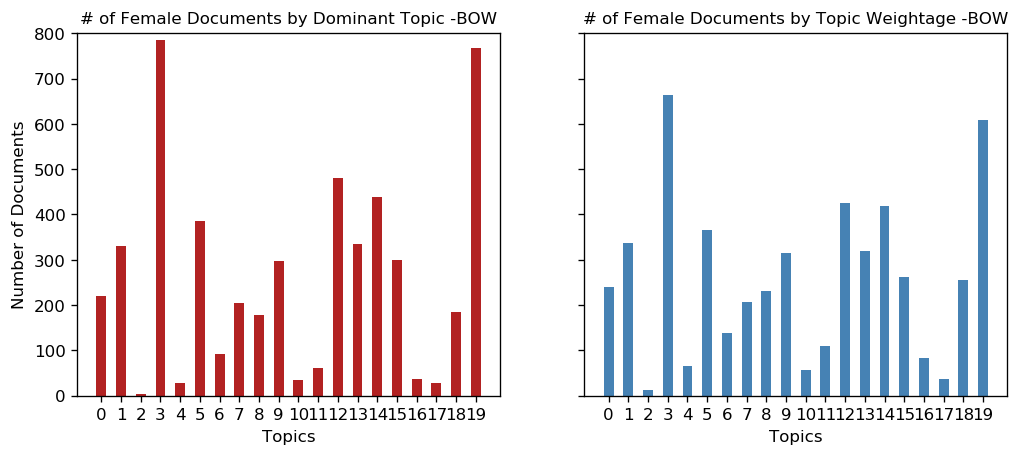

In [147]:
#female BOW
#topic weightage is the sum of all documents that have a weight for that topic

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc_fB, width=.5, color='firebrick')
ax1.set_xticks(range(0,20))
ax1.set_title('# of Female Documents by Dominant Topic -BOW', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 800)
ax1.set_xlabel('Topics')

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc_fB, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc_fB.index.unique().__len__()))
ax2.set_title('# of Female Documents by Topic Weightage -BOW', fontdict=dict(size=10))
ax2.set_xlabel('Topics')

plt.show()

In [148]:
#female TFIDF
dominant_topics_fTF, topic_percentages_fTF = topics_per_document(lda_tf_fH, tfidf_f_history)            

# Distribution of Dominant Topics in Each Document
df_fTF = pd.DataFrame(dominant_topics_fTF, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc_fTF = df_fTF.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc_fTF = dominant_topic_in_each_doc_fTF.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc_fTF = pd.DataFrame([dict(t) for t in topic_percentages_fTF])
df_topic_weightage_by_doc_fTF = topic_weightage_by_doc_fTF.sum().to_frame(name='count').reset_index()

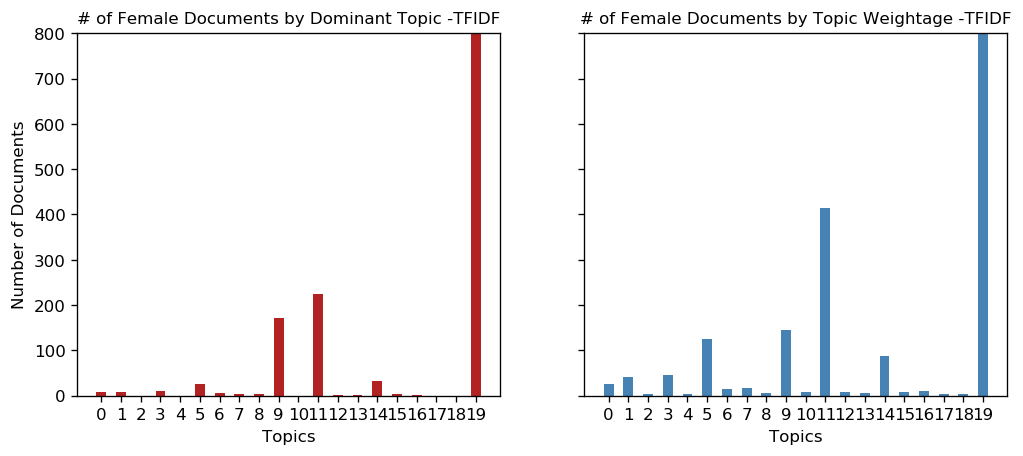

In [149]:
#female TFIDF
#topic weightage is the sum of all documents that have a weight for that topic

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc_fTF, width=.5, color='firebrick')
ax1.set_xticks(range(0,20))
ax1.set_title('# of Female Documents by Dominant Topic -TFIDF', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 800)
ax1.set_xlabel('Topics')

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc_fTF, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc_fTF.index.unique().__len__()))
ax2.set_title('# of Female Documents by Topic Weightage -TFIDF', fontdict=dict(size=10))
ax2.set_xlabel('Topics')

plt.show()

In [150]:
#Male visualization

In [151]:
#male BOW
dominant_topics_mB, topic_percentages_mB = topics_per_document(lda_hist_male, bow_hist_male)            

# Distribution of Dominant Topics in Each Document
df_mB = pd.DataFrame(dominant_topics_mB, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc_mB = df_mB.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc_mB = dominant_topic_in_each_doc_mB.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc_mB = pd.DataFrame([dict(t) for t in topic_percentages_mB])
df_topic_weightage_by_doc_mB = topic_weightage_by_doc_mB.sum().to_frame(name='count').reset_index()

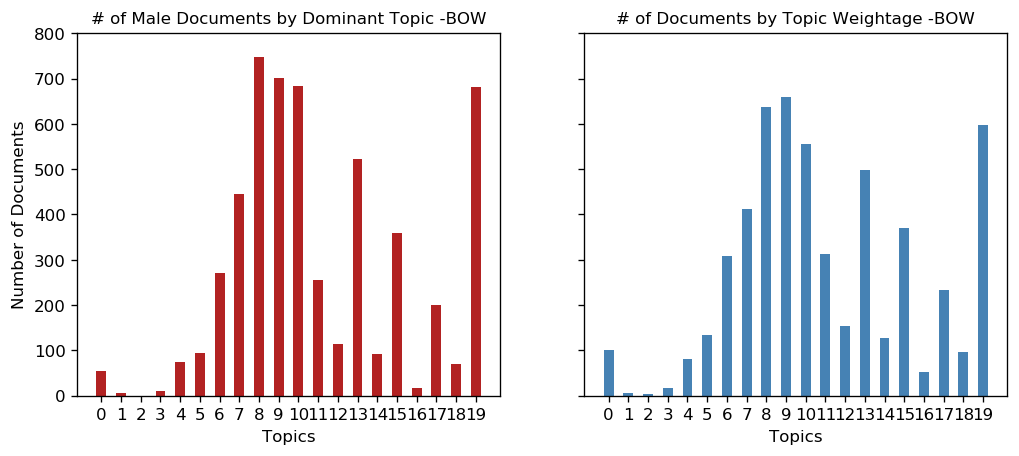

In [152]:
#male BOW
#topic weightage is the sum of all documents that have a weight for that topic

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc_mB, width=.5, color='firebrick')
ax1.set_xticks(range(0,20))
ax1.set_title('# of Male Documents by Dominant Topic -BOW', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 800)
ax1.set_xlabel('Topics')

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc_mB, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc_mB.index.unique().__len__()))
ax2.set_title('# of Documents by Topic Weightage -BOW', fontdict=dict(size=10))
ax2.set_xlabel('Topics')

plt.show()

In [153]:
#male TFIDF
dominant_topics_mTF, topic_percentages_mTF = topics_per_document(lda_tf_mH, tfidf_m_history)            

# Distribution of Dominant Topics in Each Document
df_mTF = pd.DataFrame(dominant_topics_mTF, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc_mTF = df_mTF.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc_mTF = dominant_topic_in_each_doc_mTF.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc_mTF = pd.DataFrame([dict(t) for t in topic_percentages_mTF])
df_topic_weightage_by_doc_mTF = topic_weightage_by_doc_mTF.sum().to_frame(name='count').reset_index()

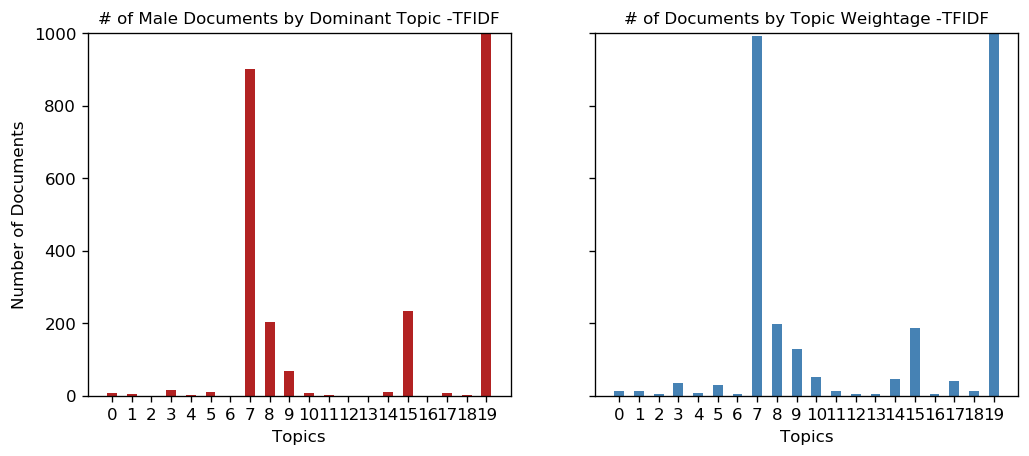

In [154]:
#male TFIDF
#topic weightage is the sum of all documents that have a weight for that topic

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc_mTF, width=.5, color='firebrick')
ax1.set_xticks(range(0,20))
ax1.set_title('# of Male Documents by Dominant Topic -TFIDF', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)
ax1.set_xlabel('Topics')

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc_mTF, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc_mTF.index.unique().__len__()))
ax2.set_title('# of Documents by Topic Weightage -TFIDF', fontdict=dict(size=10))
ax2.set_xlabel('Topics')

plt.show()

In [156]:
#create funcs and visualization for word count and weight of top words for each topic
#male TFIDF
from collections import Counter
topics_m = lda_tf_mH.show_topics(formatted=False, num_topics=20)
data_flat_m = [w for w_list in hist_docs_male for w in w_list]
counter_m = Counter(data_flat_m)

out_m = []
for i, topic in topics_m:
    for word, weight in topic:
        out_m.append([word, i , weight, counter_m[word]])

df_m = pd.DataFrame(out_m, columns=['word', 'topic_id', 'importance', 'word_count'])     

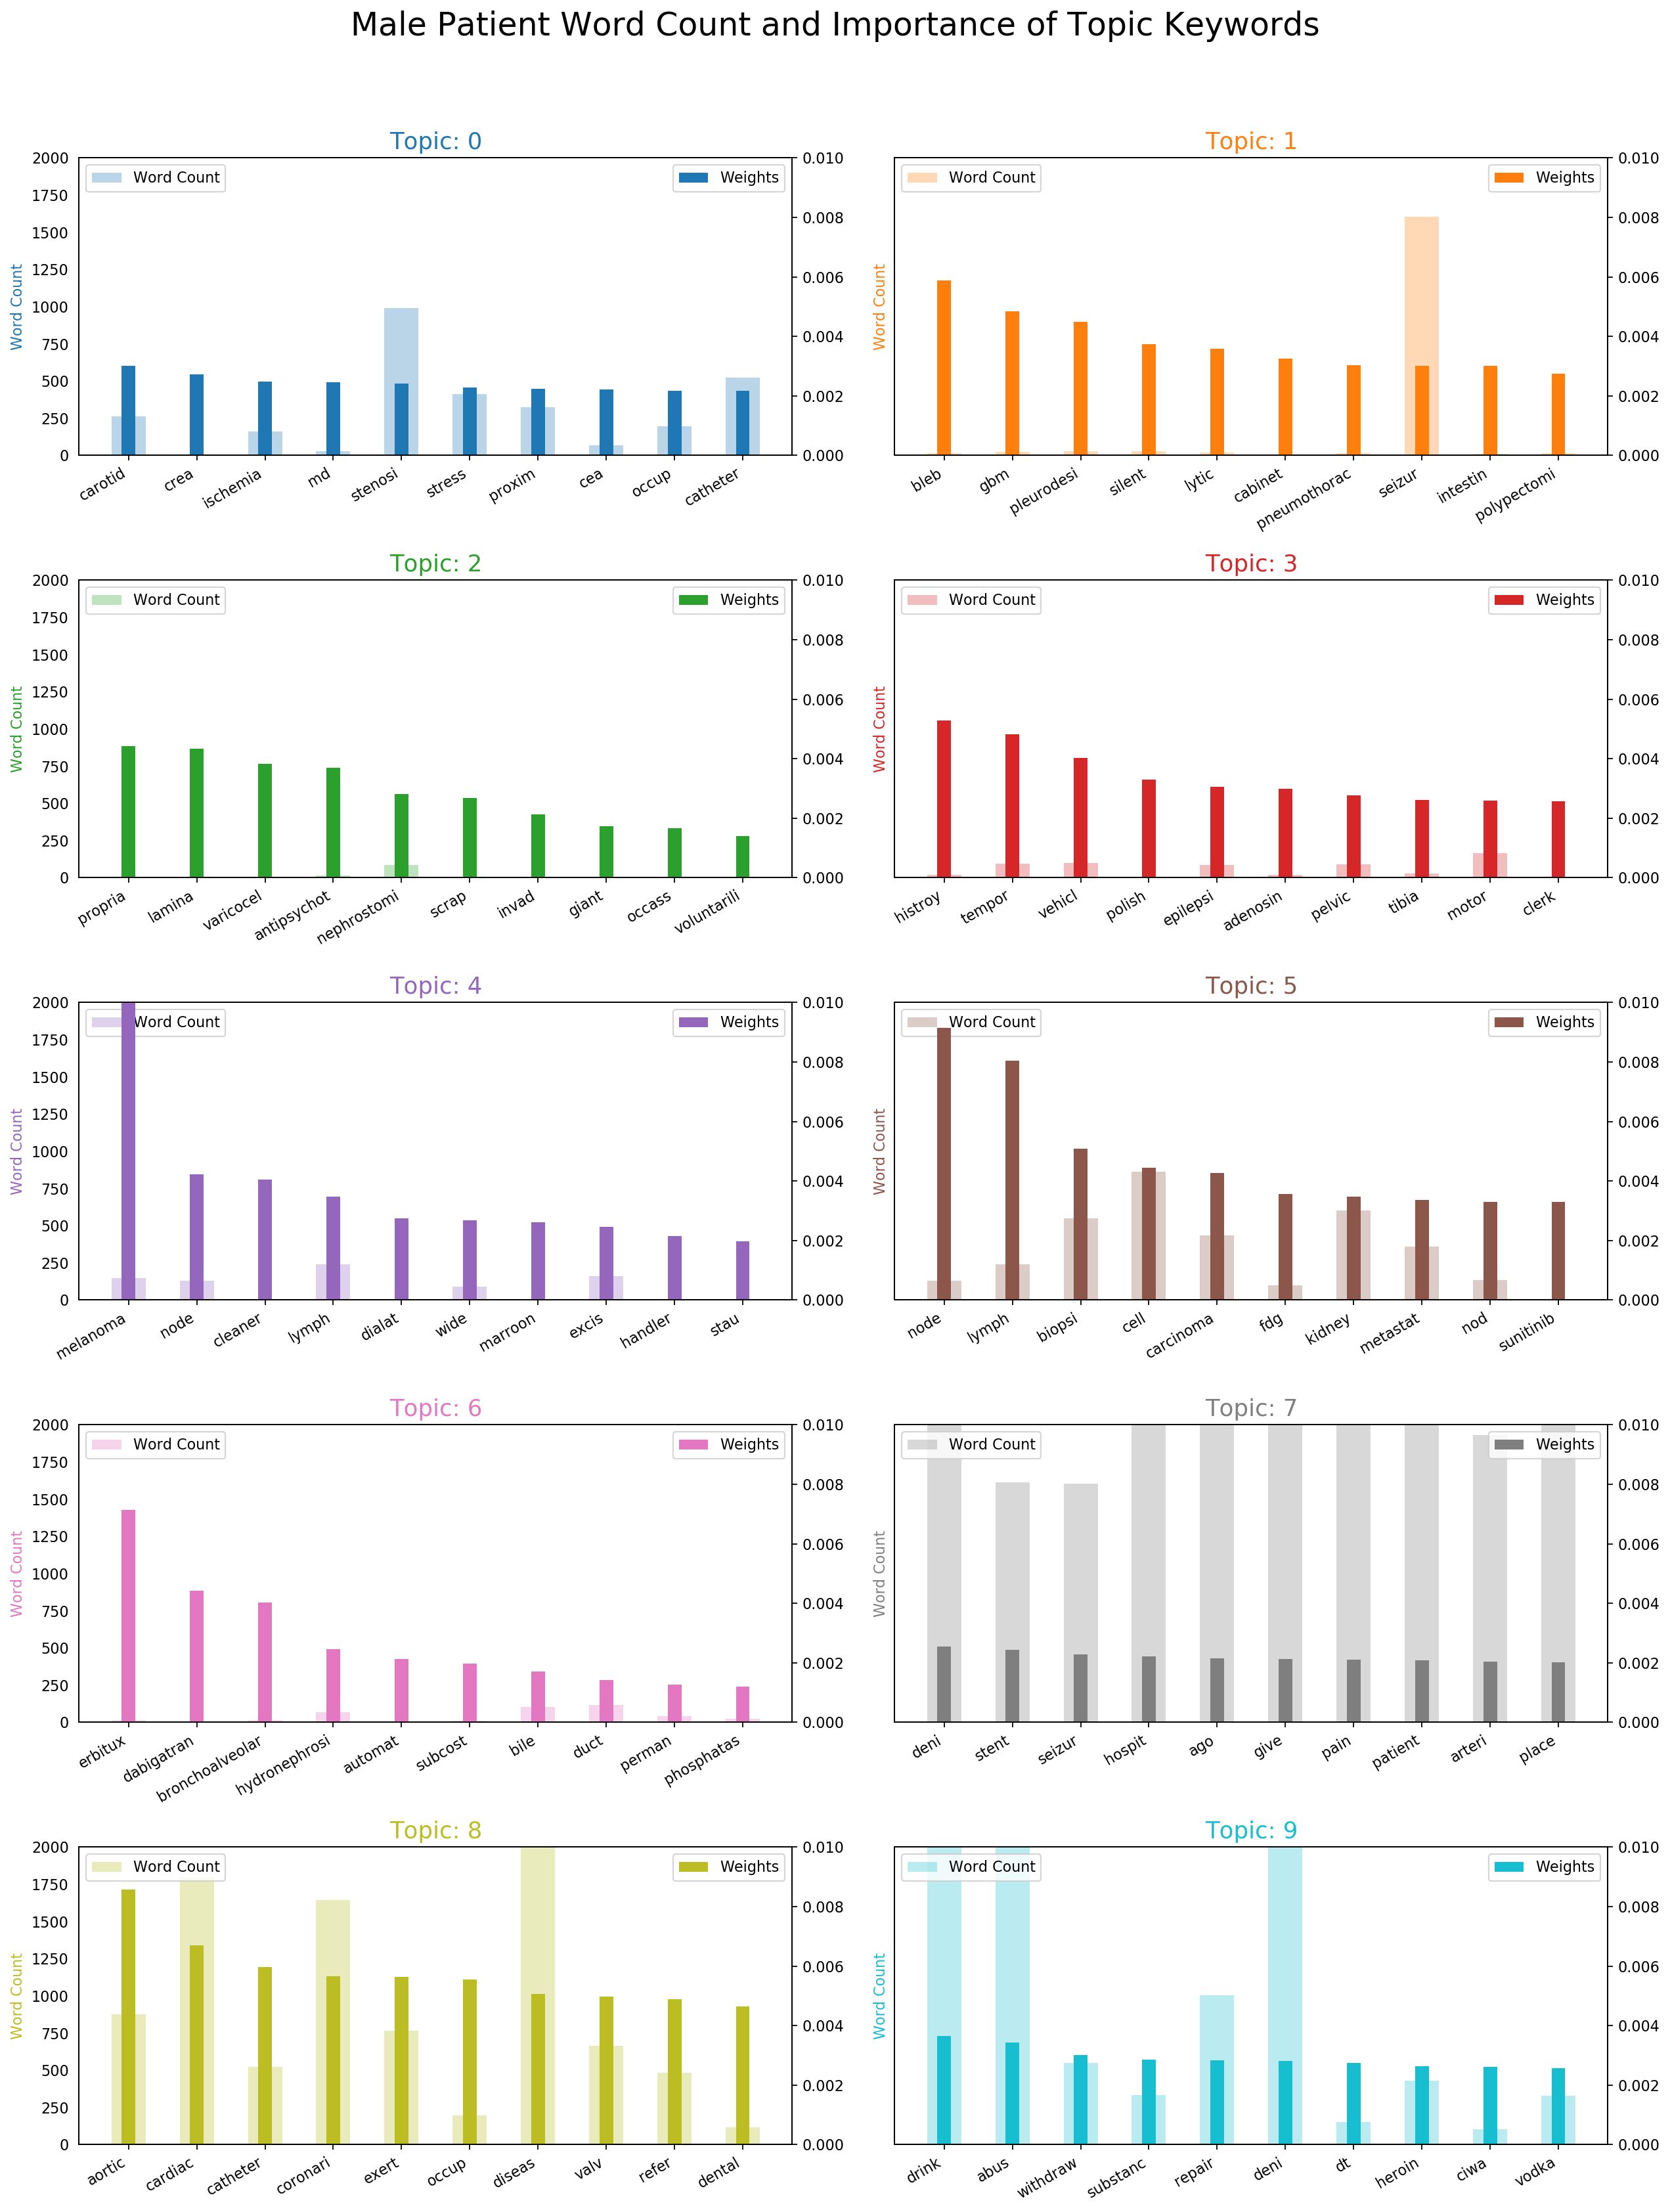

In [179]:
# Plot Word Count and Weights of Topic Keywords by topics from LDA model
fig, axes = plt.subplots(5, 2, figsize=(16,20), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df_m.loc[df_m.topic_id==i], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df_m.loc[df_m.topic_id==i], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.01); ax.set_ylim(0, 2000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df_m.loc[df_m.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)     
fig.suptitle('Male Patient Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [161]:
#create funcs and visualization for word count and weight of top words for each topic
#female TFIDF
from collections import Counter
topics_f = lda_tf_fH.show_topics(formatted=False, num_topics=20)
data_flat_f = [w for w_list in hist_docs_female for w in w_list]
counter_f = Counter(data_flat_f)

out_f = []
for i, topic in topics_f:
    for word, weight in topic:
        out_f.append([word, i , weight, counter_f[word]])

df_f = pd.DataFrame(out_f, columns=['word', 'topic_id', 'importance', 'word_count'])     

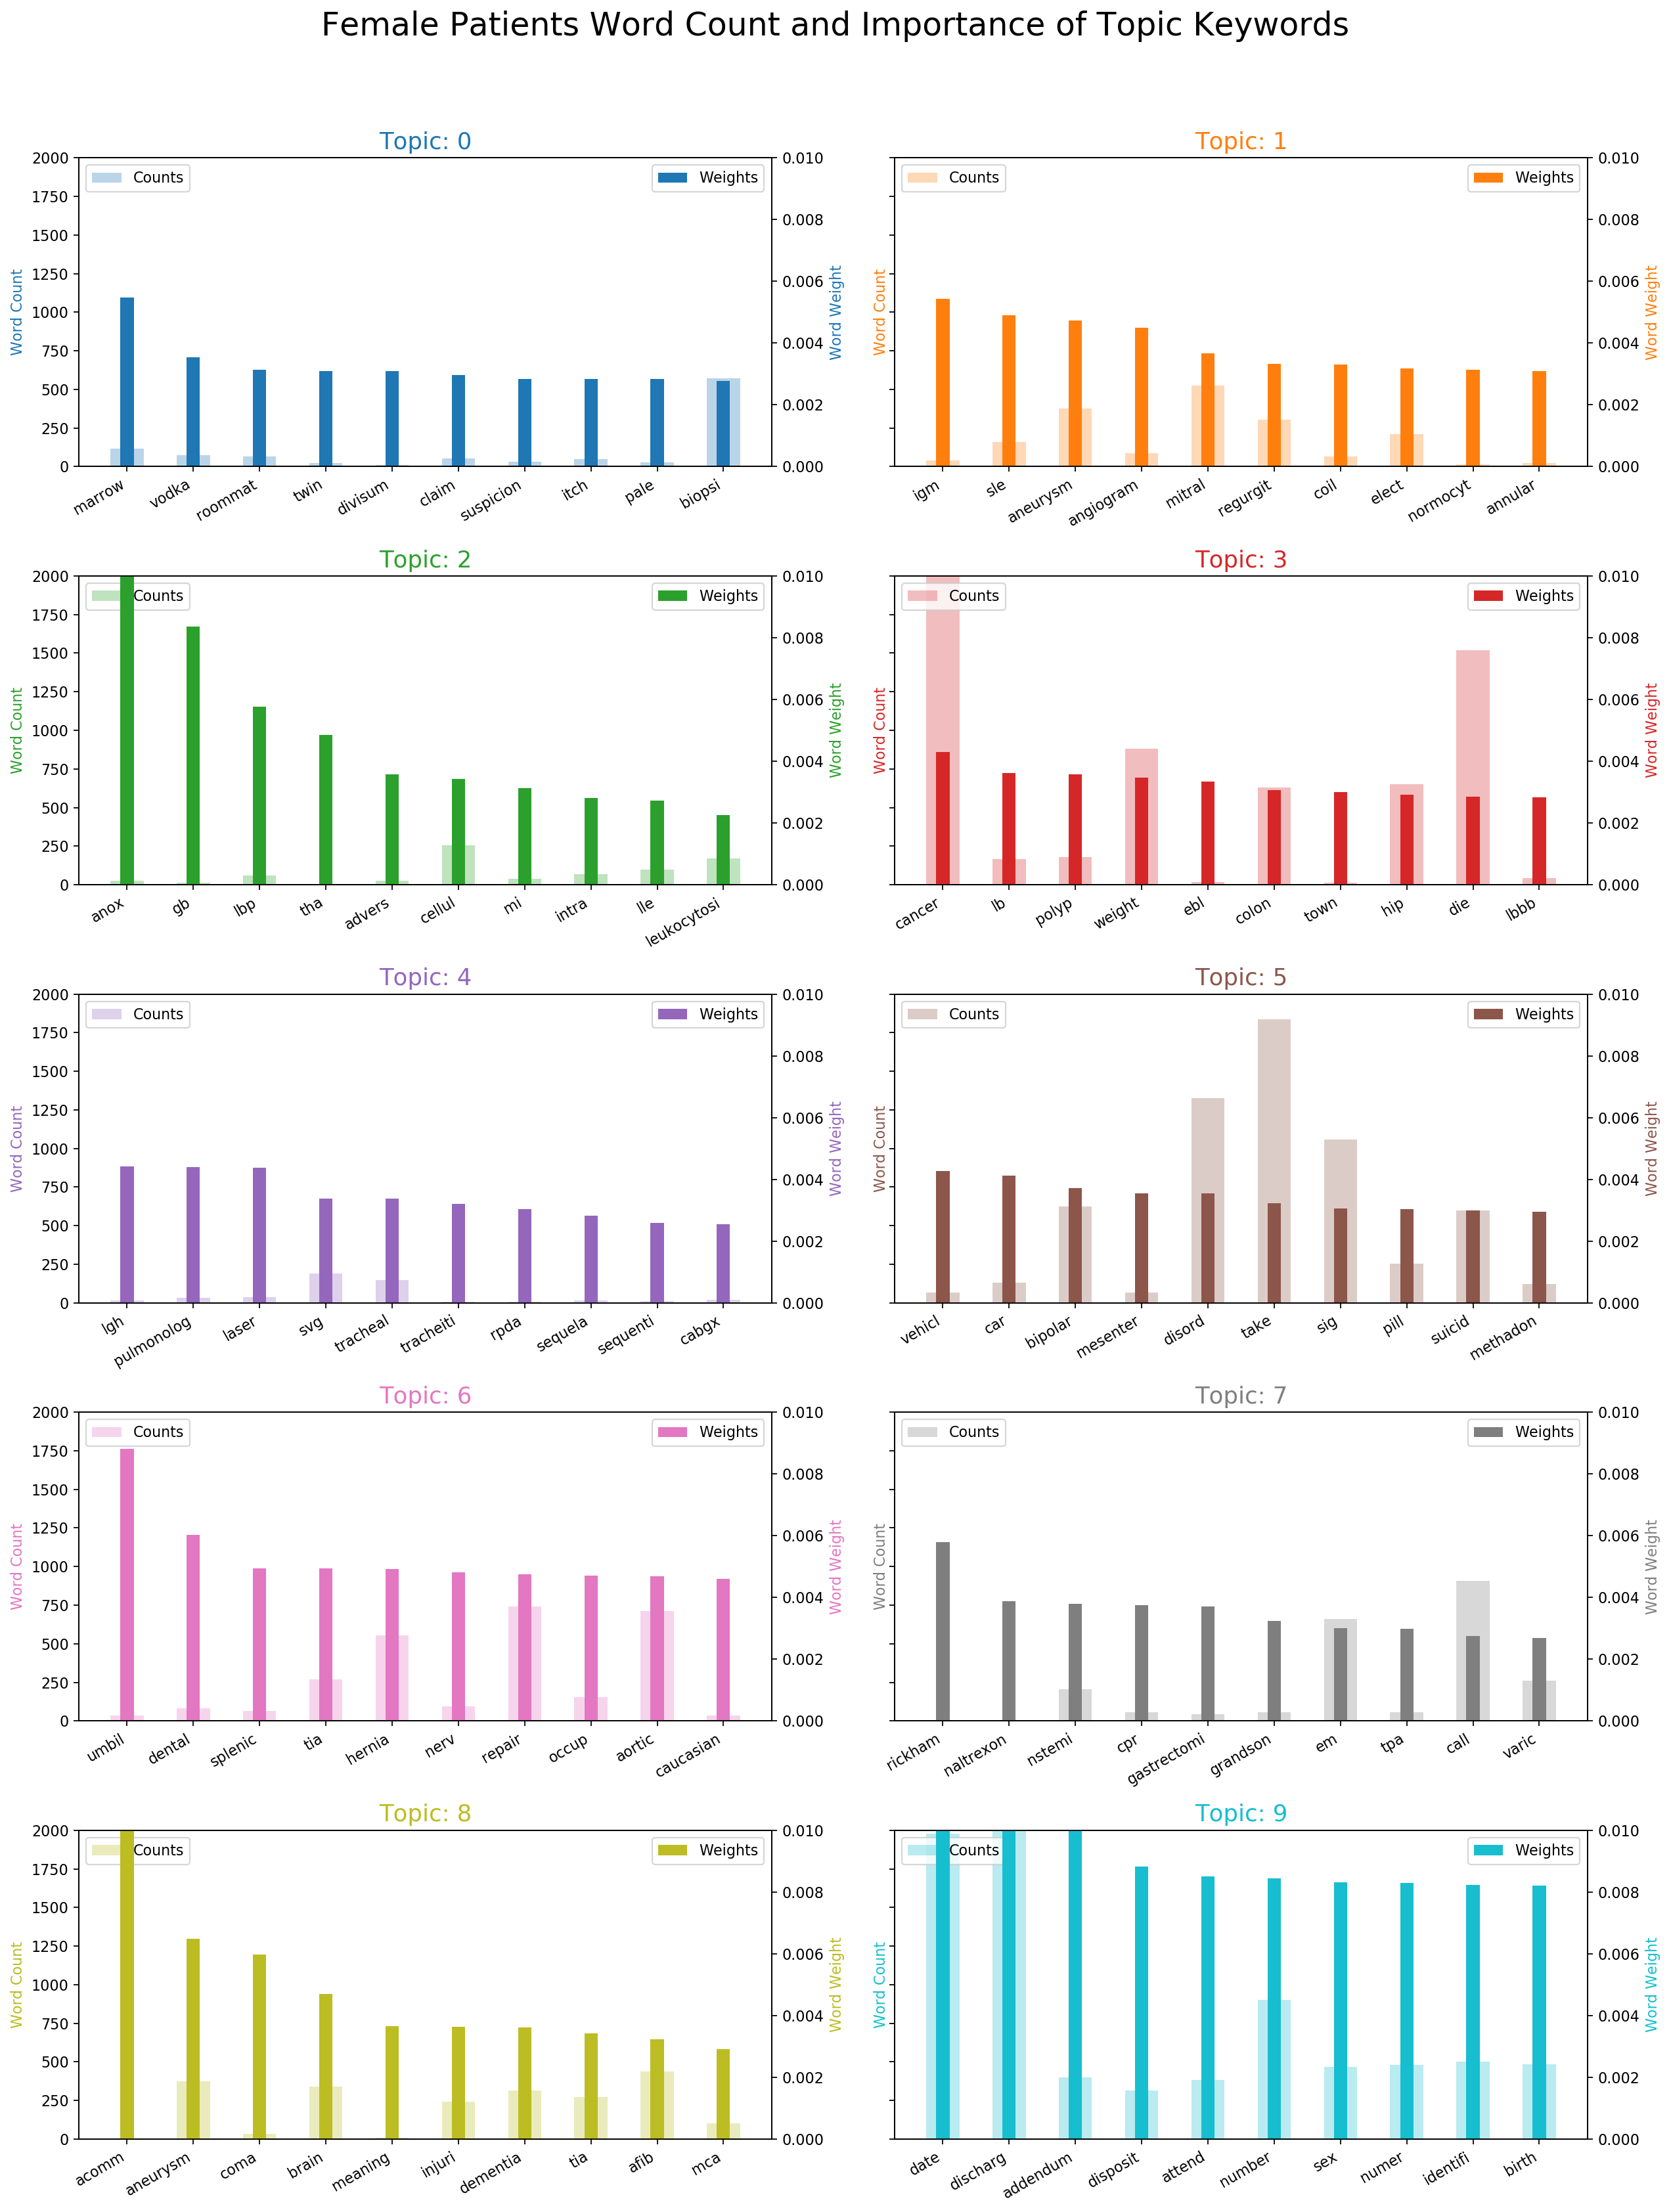

In [180]:
# Plot Word Count and Weights of Topic Keywords by topics from LDA model
fig, axes = plt.subplots(5, 2, figsize=(16,20), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df_f.loc[df_f.topic_id==i], color=cols[i], width=0.5, alpha=0.3, label='Counts')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df_f.loc[df_f.topic_id==i], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i]); ax_twin.set_ylabel('Word Weight', color=cols[i])
    ax_twin.set_ylim(0, 0.01); ax.set_ylim(0, 2000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.set_xticklabels(df_f.loc[df_f.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Female Patients Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [ ]:
#############LDA gener and ethnicity of diabetes

In [ ]:
#use preprocess function on various ethnic groups divided by gender
pd_fhispanic = icd9_fhispanic['text_processed'].map(preprocess)

In [ ]:
#create dictionary of words
dictionary_fhispanic = gensim.corpora.Dictionary(pd_fhispanic)

In [ ]:
#convert dictionary to BOW for LDA model to process
bow_corpus_fhispanic = [dictionary_fhispanic.doc2bow(doc) for doc in pd_fhispanic]

In [ ]:
#determine the TF-IDF scores or weight of a word within a document
from gensim import corpora, models
tfidf_fhispanic = models.TfidfModel(bow_corpus_fhispanic)
corpus_tfidf_fhispanic = tfidf_fhispanic[bow_corpus_fhispanic]

In [ ]:
#use preprocess function on various ethnic groups divided by gender
pd_fblack = icd9_fblack['text_processed'].map(preprocess)

In [ ]:
#create dictionary of words
dictionary_fblack = gensim.corpora.Dictionary(pd_fblack)

In [ ]:
#convert dictionary to BOW for LDA model to process
bow_corpus_fblack = [dictionary_fblack.doc2bow(doc) for doc in pd_fblack]

In [ ]:
#determine the TF-IDF scores or weight of a word within a document
from gensim import corpora, models
tfidf_fblack = models.TfidfModel(bow_corpus_fblack)
corpus_tfidf_fblack = tfidf_fblack[bow_corpus_fblack]

In [ ]:
#use preprocess function on various ethnic groups divided by gender
pd_fwhite = icd9_fwhite['text_processed'].map(preprocess)

In [ ]:
#create dictionary of words
dictionary_fwhite = gensim.corpora.Dictionary(pd_fwhite)

In [ ]:
#convert dictionary to BOW for LDA model to process
bow_corpus_fwhite = [dictionary_fwhite.doc2bow(doc) for doc in pd_fwhite]

In [ ]:
#determine the TF-IDF scores or weight of a word within a document
from gensim import corpora, models
tfidf_fwhite = models.TfidfModel(bow_corpus_fwhite)
corpus_tfidf_fwhite = tfidf_fwhite[bow_corpus_fwhite]

In [ ]:
#use preprocess function on various ethnic groups divided by gender
pd_mhispanic = icd9_mhispanic['text_processed'].map(preprocess)

In [ ]:
#create dictionary of words
dictionary_mhispanic = gensim.corpora.Dictionary(pd_mhispanic)

In [ ]:
#convert dictionary to BOW for LDA model to process
bow_corpus_mhispanic = [dictionary_mhispanic.doc2bow(doc) for doc in pd_mhispanic]

In [ ]:
#determine the TF-IDF scores or weight of a word within a document
from gensim import corpora, models
tfidf_mhispanic = models.TfidfModel(bow_corpus_mhispanic)
corpus_tfidf_mhispanic = tfidf_mhispanic[bow_corpus_mhispanic]

In [ ]:
#use preprocess function on various ethnic groups divided by gender
pd_mblack = icd9_mblack['text_processed'].map(preprocess)

In [ ]:
#create dictionary of words
dictionary_mblack = gensim.corpora.Dictionary(pd_mblack)

In [ ]:
#convert dictionary to BOW for LDA model to process
bow_corpus_mblack = [dictionary_mblack.doc2bow(doc) for doc in pd_mblack]

In [ ]:
#determine the TF-IDF scores or weight of a word within a document
from gensim import corpora, models
tfidf_mblack = models.TfidfModel(bow_corpus_mblack)
corpus_tfidf_mblack = tfidf_mblack[bow_corpus_mblack]

In [ ]:
#use preprocess function on various ethnic groups divided by gender
pd_mwhite = icd9_mwhite['text_processed'].map(preprocess)

In [ ]:
#create dictionary of words
dictionary_mwhite = gensim.corpora.Dictionary(pd_mwhite)

In [ ]:
#convert dictionary to BOW for LDA model to process
bow_corpus_mwhite = [dictionary_mwhite.doc2bow(doc) for doc in pd_mwhite]

In [ ]:
#determine the TF-IDF scores or weight of a word within a document
from gensim import corpora, models
tfidf_mwhite = models.TfidfModel(bow_corpus_mwhite)
corpus_tfidf_mwhite = tfidf_mwhite[bow_corpus_mwhite]